# Least square problem for polynomial regression 

## import library

In [381]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data points
- $\{ (x_i, y_i) \}_{i=1}^n$

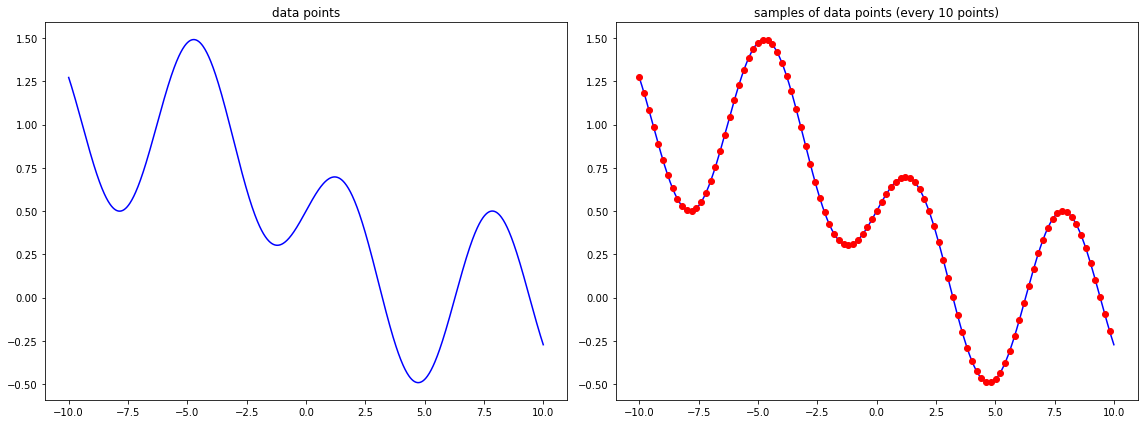

In [382]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x           = data[0, :]    # independent variable
y           = data[1, :]    # dependent variable

x_sample    = x[::10]       
y_sample    = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x, y, '-', color = 'blue')
plt.plot(x_sample, y_sample, 'o', color = 'red')
plt.title('samples of data points (every 10 points)')

plt.tight_layout()
plt.show()

## solve a linear system of equation $A z = b$
$$
A = 
\begin{bmatrix}
x_1^0 & x_1^1 & \cdots & x_1^{p-1}\\
x_2^0 & x_2^1 & \cdots & x_2^{p-1}\\
\vdots & \vdots & \vdots & \vdots\\
x_n^0 & x_n^1 & \cdots & x_n^{p-1}
\end{bmatrix},
\quad
z = 
\begin{bmatrix}
\theta_0\\
\theta_1\\
\vdots\\
\theta_{p-1}
\end{bmatrix},
\quad
b = 
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n
\end{bmatrix}
$$

## construct matrix A for the polynomial regression with power $p-1$
- useful functions : `np.power`

In [383]:
def construct_matrix_A(x, p):
    
    n = len(x)
    A = np.zeros([n, p])
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = np.zeros((n, 1))
    for i in range(p):
        PW = np.ones((1, n))*i
        temp = np.power(x,PW).reshape(n, 1)
        A = np.hstack((A, temp))
    
    A = np.delete(A, 0, axis =1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return A

## construct vector $b$

In [384]:
def construct_vector_b(y):

    n = len(y)
    b = np.zeros([n, 1])

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    b = y
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return b

## solve the linear system of equation $A z = b$
- without regularization : $\min \frac{1}{2 n}\| Az - b \|^2, \quad z = \left( A^T A \right)^{-1} A^T b$
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [385]:
def solve_regression(x, y, p):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    b = construct_vector_b(y)
    A = construct_matrix_A(x, p)
    coeff_matrix = np.matmul(A.T, A)
    coeff_matrix_inv = np.linalg.inv(coeff_matrix)
    temp = np.matmul(coeff_matrix_inv, A.T)
    z = np.matmul(temp, b)
    
    n = len(x)
    loss_temp1 = np.matmul(z.T, A.T) - b.T
    loss_temp2 = np.matmul(A, z) - b
    loss = 1 / (2*n) * np.matmul(loss_temp1, loss_temp2)
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

- with regularization : $\min \frac{1}{2 n} \| A z - b \|^2 + \frac{\alpha}{2} \| z \|^2, \quad z = \left(A^{T} A + n \alpha I \right)^{-1} A^T b$ where $I$ denotes identity matrix
- useful functions : `np.matmul, np.linalg.inv, np.sum`

In [386]:
def solve_regression_with_regularization(x, y, p, alpha):

    z       = np.zeros([p, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    b = construct_vector_b(y)
    A = construct_matrix_A(x, p)
    coeff_matrix = np.matmul(A.T, A)
    alpha = np.identity(p)*alpha
    temp = coeff_matrix +alpha
    temp = np.matmul(np.linalg.inv(temp), A.T)
    z = np.matmul(temp, construct_vector_b(y)) 
    
    n = len(x)
    loss_temp1 = np.matmul(z.T, A.T) - b.T
    loss_temp2 = np.matmul(A, z) - b
    loss_temp3 = alpha / 2 * np.matmul(z.T, z)
    loss = 1 / (2*n) * np.matmul(loss_temp1, loss_temp2) + loss_temp3
    
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return z, loss

## approximate by polynomial regression
- $ \hat{y} = A z^* $
- useful functions : `np.matmul`

In [387]:
def approximate(x, y, p):

    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x, p)
    (z, _) =  solve_regression(x,y,p)
    y_hat = np.matmul(A, z)
    
    loss = y - y_hat
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss


In [388]:
def approximate_with_regularization(x, y, p, alpha):
    
    n       = len(y)
    y_hat   = np.zeros([n, 1])
    loss    = 0

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    A = construct_matrix_A(x, p)
    (z, _) =  solve_regression_with_regularization(x,y,p,alpha)
    y_hat = np.matmul(A, z)
    
    loss = y - y_hat
    
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return y_hat, loss

___

___

## functions for presenting the results

___

___

In [389]:
def function_result_01():
    
    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.title('data points')
    plt.show()

In [390]:
def function_result_02():

    p           = 2
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [391]:
def function_result_03():

    p           = 4
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [392]:
def function_result_04():

    p           = 8
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [393]:
def function_result_05():

    p           = 16
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [394]:
def function_result_06():

    p           = 32 
    (y_hat, _)  = approximate(x, y, p)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [395]:
def function_result_07():

    p           = 2 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [396]:
def function_result_08():

    p           = 4 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [397]:
def function_result_09():

    p           = 8 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [398]:
def function_result_10():

    p           = 16 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [399]:
def function_result_11():

    p           = 32 
    alpha       = 0.1
    (y_hat, _)  = approximate_with_regularization(x, y, p, alpha)

    plt.figure(figsize=(8,6))
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, y_hat, '-', color='red')
    plt.show()

In [400]:
def function_result_12():

    p           = 4
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [401]:
def function_result_13():

    p           = 16
    (_, loss)   = approximate(x, y, p)

    print('loss = ', loss)

In [402]:
def function_result_14():

    p           = 4
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

In [403]:
def function_result_15():

    p           = 16 
    alpha       = 0.1
    (_, loss)   = approximate_with_regularization(x, y, p, alpha)

    print('loss = ', loss)

___

___

# results

___

___

**************************************************
## [RESULT 01]
**************************************************


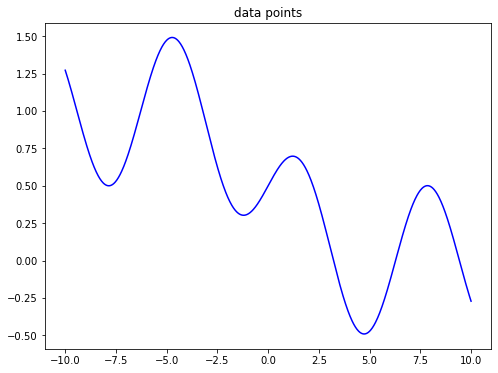

**************************************************
## [RESULT 02]
**************************************************
해보자 1000 1000
해보자 1000 1000


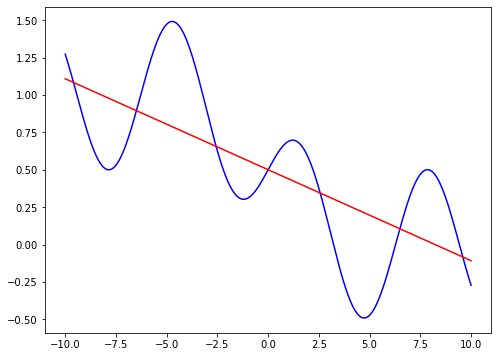

**************************************************
## [RESULT 03]
**************************************************
해보자 1000 1000
해보자 1000 1000


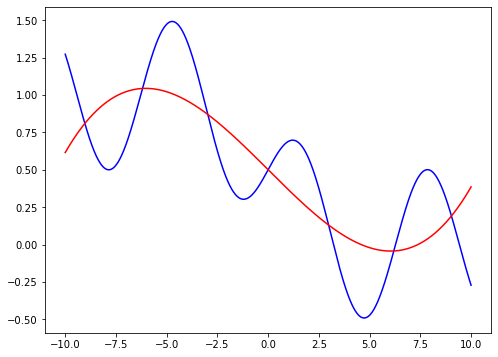

**************************************************
## [RESULT 04]
**************************************************
해보자 1000 1000
해보자 1000 1000


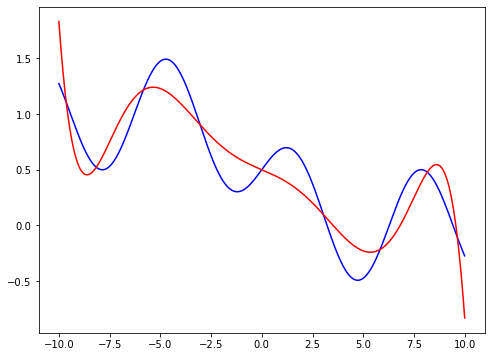

**************************************************
## [RESULT 05]
**************************************************
해보자 1000 1000
해보자 1000 1000


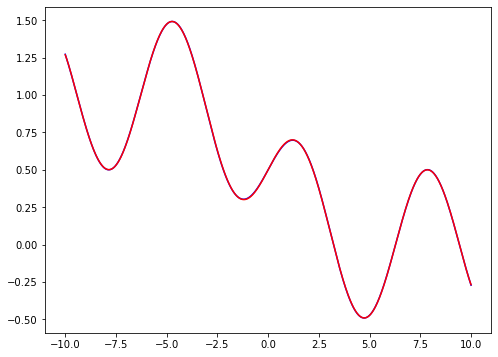

**************************************************
## [RESULT 06]
**************************************************
해보자 1000 1000
해보자 1000 1000


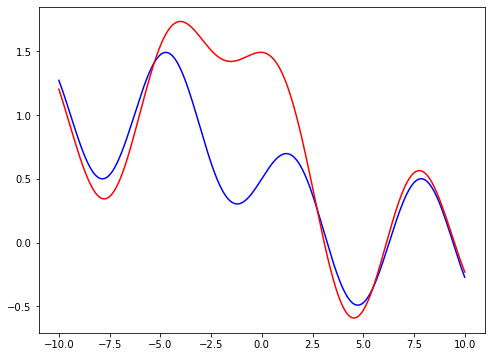

**************************************************
## [RESULT 07]
**************************************************
해보자 1000 1000
해보자 1000 1000


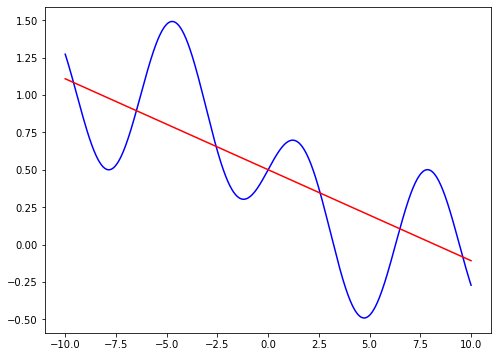

**************************************************
## [RESULT 08]
**************************************************
해보자 1000 1000
해보자 1000 1000


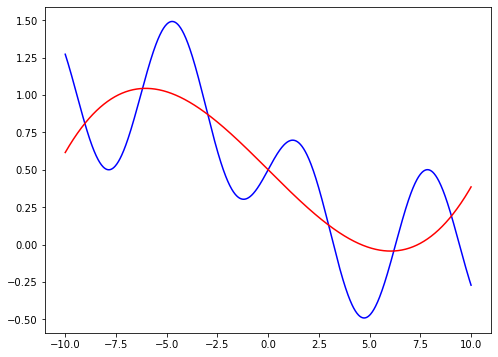

**************************************************
## [RESULT 09]
**************************************************
해보자 1000 1000
해보자 1000 1000


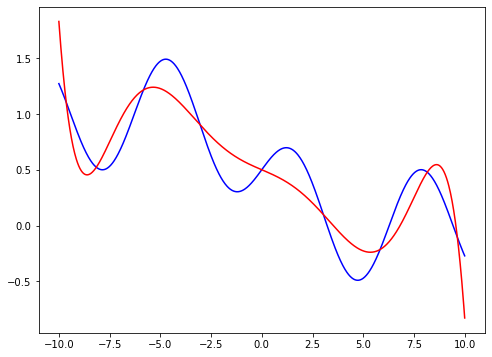

**************************************************
## [RESULT 10]
**************************************************
해보자 1000 1000
해보자 1000 1000


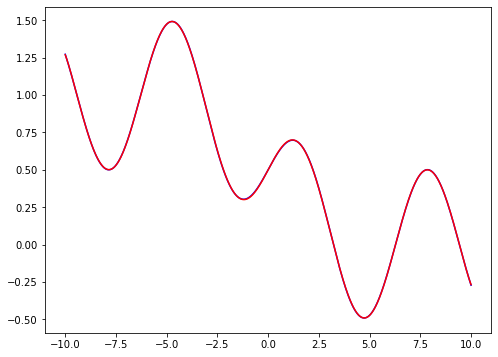

**************************************************
## [RESULT 11]
**************************************************
해보자 1000 1000
해보자 1000 1000


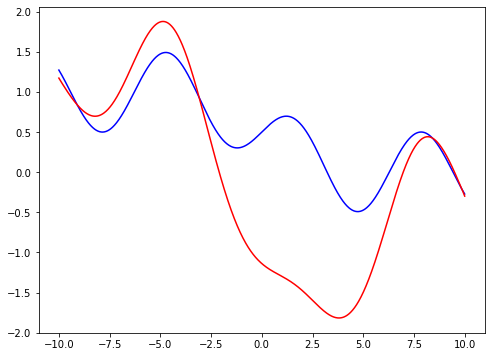

**************************************************
## [RESULT 12]
**************************************************
해보자 1000 1000
해보자 1000 1000
loss =  [ 0.65698041  0.64382016  0.63058459  0.61727564  0.60389724  0.59045335
  0.57694789  0.56338282  0.54976306  0.53609157  0.52237228  0.50860813
  0.49480407  0.48096302  0.46708895  0.45318577  0.43925644  0.4253049
  0.41133608  0.39735292  0.38335937  0.36936037  0.35535786  0.34135777
  0.32736306  0.31337645  0.29940429  0.28544832  0.27151448  0.25760572
  0.24372496  0.22987815  0.21606824  0.20229916  0.18857485  0.17489926
  0.16127632  0.14770997  0.13420416  0.12076282  0.1073899   0.09408834
  0.08086407  0.06771804  0.05465719  0.04168245  0.02879977  0.0160111
  0.00332136 -0.0092655  -0.02174754 -0.03411882 -0.04637839 -0.05852033
 -0.07054268 -0.08244151 -0.09421387 -0.10585484 -0.11736245 -0.12873279
 -0.1399629  -0.15104984 -0.16198968 -0.17278047 -0.18341827 -0.19389915
 -0.20422216 -0.21438336 -0.22437881 -0.234208

In [404]:
number_result = 15

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)